# Lecture 2: Treatment Effects & Randomized Controlled Trials (RCTs)

- Potential Outcomes model for Causal Effects.
- Fundamental Problem of Causal Inference
- Data simulations. Seeds for reproducibility. Visualizations. 
- RCTs. Difference-in-means estimator.
- Variance reduction. Lin's (2013) adjustment.


## Potential outcomes model

Imagine that we run a delivery platform that mainly provides grocery delivery services. Say that we want to understand how the first delivery of a customer arriving late affects the platform's revenue. Let $W_i \in \{0,1\}$ indicate whether customer $i$ received their initial delivery on time ($1$) or not ($0$) and let $Y_i \geq 0$ indicate the revenue per customer in their first month. $W$ is usually called **treatment** variable, and $Y$ is usually referred to as the **outcome** variable.

We would like to answer the question: How does the late status of the delivery ($W_i$) changing from $0$ to $1$ affect revenue from customer $i$, $Y_i$? The quantity we are interested in learning is the difference in the value of the outcome under $W_i = 1$ and under $W_i = 0$. The values of the outcome under the different levels of the variable of interest are known as **Potential Outcomes**, and are expressed as $Y_i(w_i)$ where $w_i$ is the realization of $W_i$. The difference between two potential outcomes is the **Individual Causal Effect**:     

$$\Delta_i = Y_i(1) - Y_i(0)$$

In the potential outcomes model, we let the observed outcome $Y_i$ be equal to the potential outcome corresponding to the realization of $W_i$. That is, if customer $i$ received their delivery on time, we would have $Y_i = Y_i(1)$. If not, then $Y_i = Y_i(0)$. This is the key aspect of this model: potential outcomes are not directly observable. We learn them through the observed outcome $Y_i$.

## Fundamental Problem of Causal Inference

Let's go back to our main question about individual causal effects. As it stands, we claim that this question is _fundamentally_ impossible to answer. Why? Because customer's $i$ first delivery occurs once and either arrives late or not, not both. Equivalently, $Y_i$ can be equal to either $Y_i(0)$ or $Y_i(1)$, not both, which is the same to say as we can learn $Y_i(0)$ or $Y_i(1)$ through $Y_i$, but not both.

Say that customer $i$ received their delivery late and their revenue per month is low, equal to $0.50$. Therefore, $w_i = 0$ and $Y_i = Y_i(0) = 0.50$. Can we claim that had they received the delivery on time, they would have led to less revenue for our platform? That is, can we claim that $Y_i(1) > 0.50$? Under this framework, it becomes evident that we cannot learn $Y_i(1)$ through direct observation if $w_i = 0$, because $w_i$ can only take one value. It might be true that having received the delivery on time might have increased revenue because of how the customer perceives the quality of the service, but the observed data is also consistent with a scenario where the customer would have churned regardless of lateness because, say, they did not receive all the items they ordered. 

In this model, potential outcomes under values of the variable of interest different than the one realized are called **counterfactual** outcomes, or simply **counterfactuals**. In the example above, where $w_i = 0$ and we learn $Y_i(0)$ through $Y_i$, $Y_i(1)$ is the counterfactual. To learn it through observation, we would need to be in a world scenario under which the same customer places the same order at the same point in time, and all else equal, the delivery arrives on time, that is, $w_i = 1$. This is obviously impossible, (hence the name "counterfactual") and this is what is known as the Fundamental Problem of Causal Inference. We cannot possibly learn individual causal effects.

But that does not mean we cannot learn anything. Causal Inference is the discipline that attempts to construct credible counterfactuals that allow us to learn a variety of causal effects. In this course, we will focus on the most common, most studied, and arguably, one of the most useful quantities in the causal inference universe: the **Average Causal Effect** or **Average Treatment Effect (ATE)**.   

## Average Treatment Effects (ATE)

We concluded that we cannot learn individual causal effects. But we might still be interested in the effect of a late delivery on revenue for the average customer. Let's define the **Average treatment effect** (or **ATE**) $\tau$ as:

\begin{align*}
\tau &= \mathbb{E}[\Delta_i] \\
\tau &= \mathbb{E}[Y_i(1) - Y_i(0)] \\
\tau &= \mathbb{E}[Y_i(1)] - \mathbb{E}[Y_i(0)]
\end{align*}

Do we have a chance of learning $\tau$? Let's say we have a sample of $n$ customers. In our sample, we will have some that received lates, and some that received orders on time. Could we extract some learnings about the average customer from analyzing the revenue per customer of these groups? We can definitely observe revenue for the average customer under the "late" group, and for the customer under the "on-time" group. Could we construct some estimator for $\tau$ with this? An intuitive one would be computing the difference in means of the two groups. Let $n_1$ and $n_0$ be the number of customers in each group, respectively, and let $n=n_1 + n_0$. The **Difference in Means** estimator is defined as:

$$\hat{\tau}_{DM} = \frac{1}{n_1}\sum_{W_i = 1} Y_i - \frac{1}{n_0}\sum_{W_i = 0} Y_i$$

Is this a good estimator for $\tau$? Let's find out. Using the fact that $W_i \in \{0,1\}$ and standard properties of expectation, we can write:

\begin{align*}
\mathbb{E}[\hat{\tau}_{DM}] &= \mathbb{E}\left[\frac{1}{n_1}\sum_{W_i = 1} Y_i - \frac{1}{n_0}\sum_{W_i = 0} Y_i\right]\\
\mathbb{E}[\hat{\tau}_{DM}] &= \frac{1}{n_1}\sum_{i}\mathbb{E}\left[W_iY_i\right] - \frac{1}{n_0}\sum_i\mathbb{E}\left[(1-W_i) Y_i\right]\\
\end{align*}

And now we use the Potential Outcomes model. More precisely, we introduce a critical assumption for this model to work: the Stable Unit Treatment Values Assumption or SUTVA:

\begin{equation*}
\text{(SUTVA):} \; Y_i = Y_i(W_i), \qquad i=1,\ldots,n
\end{equation*}

In plain language, SUTVA requires that potential outcomes for a unit are function of the unit's own treatment and not change under different realization of the treatment for other units (something we glossed over when introducing the framework). This is also known as the "No interference" assumption. In our scenario, it means that the fact that a given customer received their delivery late or not has no impact on the revenue of the other customers.      

Let's continue with our estimator:

\begin{align*}
\mathbb{E}[\hat{\tau}_{DM}] &= \frac{1}{n_1}\sum_{i}\mathbb{E}\left[W_iY_i\right] - \frac{1}{n_0}\sum_i\left[(1-W_i) Y_i\right]\\
\mathbb{E}[\hat{\tau}_{DM}] &= \frac{1}{n_1}\sum_{i}\mathbb{E}\left[W_iY_i(1)\right] - \frac{1}{n_0}\sum_i\mathbb{E}\left[(1-W_i) Y_i(0)\right]\\
\end{align*}

It seems that we would need to know something about the joint distribution of $W_i$, $Y_i(1)$ and $Y_i(0)$ to compute the expectations. But what if we simply assume that $W_i$ is independent from $Y_i(1)$ and $Y_i(0)$? Then we would have:

\begin{align*}
\mathbb{E}[\hat{\tau}_{DM}] &= \frac{1}{n_1}\sum_{i}\mathbb{E}\left[W_iY_i(1)\right] - \frac{1}{n_0}\sum_i\mathbb{E}\left[(1-W_i) Y_i(0)\right]\\
\mathbb{E}[\hat{\tau}_{DM}] &= \frac{1}{n_1}\sum_{i}\mathbb{E}\left[W_i\right]\mathbb{E}\left[Y_i(1)\right] - \frac{1}{n_0}\sum_i\mathbb{E}\left[(1-W_i)\right] \mathbb{E}\left[Y_i(0)\right]\\
\end{align*}

We are getting closer! Let's impose one additional assumption, that the probability of customer $i$ receiving their delivery on time is equal to the observed fraction of customers with on-time deliveries $n_1$ over the total number of observed customers $n$, for all $i$. Then:  

\begin{align*}
\mathbb{E}[\hat{\tau}_{DM}] &= \frac{1}{n_1}\sum_{i}\mathbb{E}\left[W_i\right]\mathbb{E}\left[Y_i(1)\right] - \frac{1}{n_0}\sum_i\mathbb{E}\left[(1-W_i)\right] \mathbb{E}\left[Y_i(0)\right]\\
\mathbb{E}[\hat{\tau}_{DM}] &= \frac{1}{n_1}\sum_{i}\frac{n_1}{n}\mathbb{E}\left[Y_i(1)\right] - \frac{1}{n_0}\sum_i 1-\frac{n_1}{n} \mathbb{E}\left[Y_i(0)\right]\\
\mathbb{E}[\hat{\tau}_{DM}] &= \frac{1}{n} \sum_{i}\mathbb{E}\left[Y_i(1)\right] - \frac{1}{n}\sum_i  \mathbb{E}\left[Y_i(0)\right]\\
\mathbb{E}[\hat{\tau}_{DM}] &= \frac{1}{n} \sum_{i}\mathbb{E}\left[Y_i(1) - Y_i(0)\right]\\
\end{align*}

Finally, if we assume that the potential outcomes pairs are $iid$, we get:  

\begin{align*}
\mathbb{E}[\hat{\tau}_{DM}] &= \frac{1}{n} \sum_{i}\mathbb{E}\left[Y_i(1) - Y_i(0)\right]\\
\mathbb{E}[\hat{\tau}_{DM}] &= \mathbb{E}\left[Y_i(1) - Y_i(0)\right]\\
\mathbb{E}[\hat{\tau}_{DM}] &= \tau\\
\end{align*}

Furthermore, the $iid$ assumption gets us a way to easily construct confidence intervals using the Central Limit Theorem:


$$\sqrt{n}(\hat{\tau}_{DM} - \tau) \implies \mathcal{N}(0, \mathbb{V}_{DM}), \qquad \mathbb{V}_{DM} = \frac{\mathbb{V}[Y_i(0)]}{1-\pi} + \frac{\mathbb{V}[Y_i(1)]}{\pi}$$

where $\frac{n_1}{n} \overset{p}{\to} \pi$ is and $\mathbb{V}_{DM}$ can be consistenly estimated with:

$$\hat{\mathbb{V}}_{DM} = \frac{n}{n_0^2} \sum_{W_i = 0} \left(Y_i - \frac{1}{n_0}\sum_{W_i = 0}Y_i\right)^2 + \frac{n}{n_1^2} \sum_{W_i = 1} \left(Y_i - \frac{1}{n_1}\sum_{W_i = 1}Y_i\right)^2$$ 

## RCTs

So, $\hat{\tau}_{DM}$ unbiased for $\tau$ requires a number of assumptions. Two of them, SUTVA and pairs of potential outcomes being $iid$ are ones that will be carried over throughout. But the remaining assumption, independence of $W_i$ from the potential outcomes, requires more attention. Let's think through the implications in the context of our lates and revenue per customer setting. If we believe that deliveries arriving late are not related to revenue potential outcomes for users then our difference-in-means estimator is unbiased. But what if users that experience a late delivery are more likely to have a stronger need for our services and therefore a higher baseline revenue? It could be that these users would use our service more actively, ordering more items and increasing the chances of the delivery being late. If this is true, then what can't be true is $W_i$ being independent from the potential outcomes, and therefore $\hat{\tau}_{DM}$ is not unbiased anymore and does not **identify** the average treatment effect $\tau$. In our scenario, the average customer who receives their deliveries on time is not a good counterfactual for the average customer who receives their deliveries late, and viceversa, so they cannot be reliably compared.

The treatment independence assumption is hard to defend in almost every situation. But there is one situation where we can have it for granted, and that is when we have direct control of the treatment assignment. In this ideal world, we can simply randomize among our customers which ones get a late delivery and which ones don't by flipping a coin for each customer. Independence of treatment from potential outcomes holds by construction and, under the other assumptions, difference-in-means is indeed a valid estimator for $\tau$. This is known as a **Randomized Control Trial (RCT)**, or randomized experiment.

Let's imagine that we have the power to randomly assign our late treatment and we run an experiment on our customer base and explore the difference in means estimator. We will simulate the following data generating process (DGP):

\begin{align*}
i &= 1,\ldots, n\\
X_{ij} &\overset{iid}{\sim} \mathcal{U}(-1, 1), \; j \in \{1,2,3\}\\
W_i &\overset{iid}{\sim} Ber(p)\\
Y_i &= \text{exp}(X_{1i} + X_{2i}) + 0.25 W_i  
\end{align*}

In [1]:
import dgp_simulation
import estimators
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

def disable_sci(ax):
    ax.ticklabel_format(style="plain", axis="both", useOffset=False)
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(ScalarFormatter())

In [2]:
base_params = {
    "p": 0.5,
    "n": 100_000,
    "seed": 42,
    "rct": True,
}

In [3]:
rct_df = dgp_simulation.simulate_dgp(**base_params)
rct_df.head()

,W,Y,X1,X2,X3
0,0,1.530614,0.547912,-0.122243,0.717196
1,0,0.659081,0.394736,-0.811645,0.951245
2,1,3.237414,0.522279,0.572129,-0.743773
3,1,0.949330,-0.099228,-0.258404,0.853530
4,1,2.792769,0.287730,0.645523,-0.113172


In [4]:
rct_df.describe()

,W,Y,X1,X2,X3
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.498160,1.506749,-0.000826,-0.000129,0.002019
std,0.499999,1.187209,0.576571,0.576583,0.578419
min,0.000000,0.136912,-0.999949,-0.999973,-0.999974
25%,0.000000,0.682696,-0.502914,-0.499878,-0.500126
50%,0.000000,1.129547,-0.000944,0.000435,0.003324
75%,1.000000,1.933943,0.498782,0.498470,0.503851
max,1.000000,7.600122,0.999996,0.999973,0.999945


In [5]:
estimators.diff_in_means(rct_df)

{'estimate': 0.2586990946482195,
 'std_error': 0.0074641258428070865,
 'ci_95': [0.2440694079963176, 0.2733287813001214],
 'ci_size_perc': 11.310195477719338,
 'p_value': 3.269898589455173e-263}

In [6]:
#### Sweep p: average estimate/variance/std error across S simulations
p_values = np.linspace(0.05, 0.95, 19)
S = 100

rows = []
for p in p_values:
    estimates = []
    std_errors = []
    for s in range(S):
        params = base_params.copy()
        params["p"] = float(p)
        params["seed"] = base_params["seed"] + s if base_params["seed"] is not None else None
        df = dgp_simulation.simulate_dgp(**params)
        res = estimators.diff_in_means(df)
        estimates.append(res["estimate"])
        std_errors.append(res["std_error"])
    rows.append(
        {
            "p": float(p),
            "avg_estimate": float(np.mean(estimates)),
            "avg_std_error": float(np.mean(std_errors)),
        }
    )

p_sweep_df = pd.DataFrame(rows)

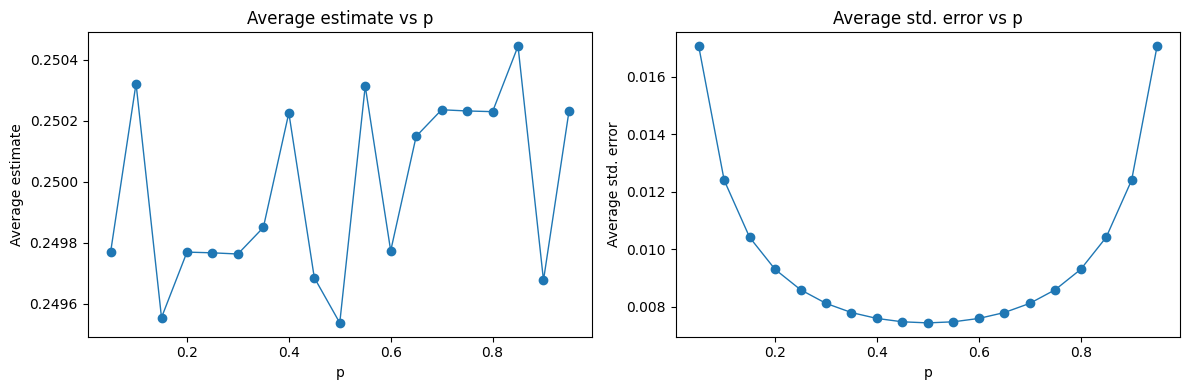

In [7]:
#### Plot: avg estimate/std error vs p
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(p_sweep_df["p"], p_sweep_df["avg_estimate"], marker="o", linewidth=1)
axes[0].set_title("Average estimate vs p")
axes[0].set_xlabel("p")
axes[0].set_ylabel("Average estimate")

axes[1].plot(
    p_sweep_df["p"], p_sweep_df["avg_std_error"], marker="o", linewidth=1
)
axes[1].set_title("Average std. error vs p")
axes[1].set_xlabel("p")
axes[1].set_ylabel("Average std. error")

for ax in axes:
    ax.ticklabel_format(style="plain", axis="both", useOffset=False)

plt.tight_layout()
plt.show()

In [8]:
#### Sweep n: average estimate/variance/std error across S simulations
n_values = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]
S = 100

rows = []
for n in n_values:
    estimates = []
    std_errors = []
    for s in range(S):
        params = base_params.copy()
        params["n"] = int(n)
        params["seed"] = base_params["seed"] + s if base_params["seed"] is not None else None
        df = dgp_simulation.simulate_dgp(**params)
        res = estimators.diff_in_means(df)
        estimates.append(res["estimate"])
        std_errors.append(res["std_error"])
    rows.append(
        {
            "n": int(n),
            "avg_estimate": float(np.mean(estimates)),
            "avg_std_error": float(np.mean(std_errors)),
        }
    )

n_sweep_df = pd.DataFrame(rows)

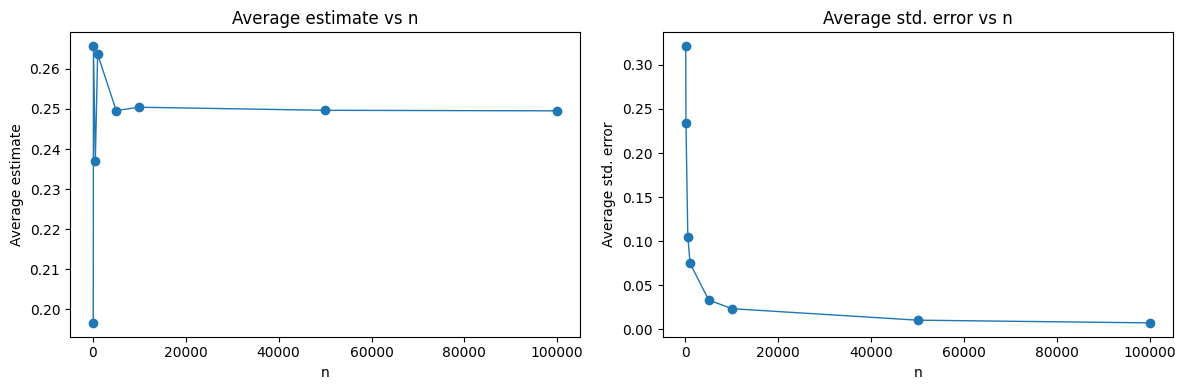

In [9]:
#### Plot: avg estimate/std error vs n
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(n_sweep_df["n"], n_sweep_df["avg_estimate"], marker="o", linewidth=1)
axes[0].set_title("Average estimate vs n")
axes[0].set_xlabel("n")
axes[0].set_ylabel("Average estimate")

axes[1].plot(
    n_sweep_df["n"], n_sweep_df["avg_std_error"], marker="o", linewidth=1
)
axes[1].set_title("Average std. error vs n")
axes[1].set_xlabel("n")
axes[1].set_ylabel("Average std. error")

for ax in axes:
    ax.ticklabel_format(style="plain", axis="both", useOffset=False)

plt.tight_layout()
plt.show()

## Variance Reduction

### Regression-based adjustments

The difference in means estimator is nice because it is both simple and straight-forward. But it is not the only way to get an unbiased estimator for $\tau$ and, in fact, other estimators strictly dominate it, essentially because they make use of other available data.

Let's first establish some comparisons. It is easy to obtain $\hat{\tau}_{DM}$ in a regression setting, namely by fitting the following model:

$$Y_i \sim \alpha + \tau W_i$$

In [10]:
estimators.regression_based(rct_df)

{'estimate': 0.2586990946482305,
 'std_error': 0.00746420048518546,
 'ci_95': [0.24406935344715155, 0.27332883584930945],
 'ci_size_perc': 11.31023764963069,
 'p_value': 1.1928611962444138e-261}

In [11]:
estimators.diff_in_means(rct_df)

{'estimate': 0.2586990946482195,
 'std_error': 0.0074641258428070865,
 'ci_95': [0.2440694079963176, 0.2733287813001214],
 'ci_size_perc': 11.310195477719338,
 'p_value': 3.269898589455173e-263}

Can we do better? The answer is yes. By adding covariates $X$ into the regression specification, we can reduce the variance of our estimator:

$$Y_i \sim \alpha + \tau W_i + \beta_1 X_{1i} + \beta_2 X_{2i}$$

In [12]:
estimators.regression_based(rct_df, cov=["X1", "X2"])

{'estimate': 0.25206056243080704,
 'std_error': 0.0032351548783069828,
 'ci_95': [0.24571969863428467, 0.2584014262273294],
 'ci_size_perc': 5.031222445409725,
 'p_value': 0.0}

But this matches our DGP, so it is expected to perform well. What if we added the wrong specification for the variable, say only $X_2$?

In [13]:
estimators.regression_based(rct_df, cov=["X2"])

{'estimate': 0.2558157863933728,
 'std_error': 0.005736038429521162,
 'ci_95': [0.24457322157748276, 0.26705835120926286],
 'ci_size_perc': 8.7895786060694,
 'p_value': 0.0}

Still looks good. What if we added a totally unrelated variable, say $X_3$?

In [14]:
estimators.regression_based(rct_df, cov=["X3"])

{'estimate': 0.25869711595982164,
 'std_error': 0.007464182110462673,
 'ci_95': [0.24406741077120267, 0.27332682114844065],
 'ci_size_perc': 11.310296316477787,
 'p_value': 1.2002767130253317e-261}

It doesn't seem we lose anything with respect to difference-in-means from adding $X_3$, so why don't we simply add all what we have? What if we added unrelated variables $Z_1$ to $Z_{20}$?

In [15]:
rng = np.random.default_rng(42)

z = rng.normal(0.0, 1.0, size=(len(rct_df), 20))
z_cols = [f"Z{i}" for i in range(1, 21)]
df_z20 = rct_df.join(pd.DataFrame(z, columns=z_cols, index=rct_df.index))

estimators.regression_based(df_z20, cov=z_cols)

{'estimate': 0.25868004160171776,
 'std_error': 0.00746627229623163,
 'ci_95': [0.24404623964102162, 0.2733138435624139],
 'ci_size_perc': 11.314210304038362,
 'p_value': 1.8114088370234253e-261}

In [16]:
#### Sweep number of Zs: avg estimate/std error for regression tau
S = 100

dm_estimates = []
dm_std_errors = []
reg_spec_estimates = []
reg_spec_std_errors = []
reg_x1_estimates = []
reg_x1_std_errors = []
rows = []
for k in [1, 5, 10, 20, 50, 100]:
    estimates = []
    std_errors = []
    for s in range(S):
        params = base_params.copy()
        params["seed"] = base_params["seed"] + s if base_params["seed"] is not None else None
        df = dgp_simulation.simulate_dgp(**params)

        rng = np.random.default_rng(params["seed"])
        z = rng.normal(0.0, 1.0, size=(len(df), k))
        z_cols = [f"Z{i}" for i in range(1, k + 1)]
        df_z = df.join(pd.DataFrame(z, columns=z_cols, index=df.index))

        res = estimators.regression_based(df_z, cov=z_cols)
        estimates.append(res["estimate"])
        std_errors.append(res["std_error"])

        dm = estimators.diff_in_means(df)
        reg_spec = estimators.regression_based(df, cov=["X1", "X2"])
        reg_x1 = estimators.regression_based(df, cov=["X1"])
        dm_estimates.append(dm["estimate"])
        dm_std_errors.append(dm["std_error"])
        reg_spec_estimates.append(reg_spec["estimate"])
        reg_spec_std_errors.append(reg_spec["std_error"])
        reg_x1_estimates.append(reg_x1["estimate"])
        reg_x1_std_errors.append(reg_x1["std_error"])

    rows.append(
        {
            "num_z": k,
            "avg_estimate": float(np.mean(estimates)),
            "avg_std_error": float(np.mean(std_errors)),
        }
    )

z_count_df = pd.DataFrame(rows)
dm_est = float(np.mean(dm_estimates))
dm_se_avg = float(np.mean(dm_std_errors))
reg_spec_avg = float(np.mean(reg_spec_estimates))
reg_spec_se_avg = float(np.mean(reg_spec_std_errors))
reg_x1_avg = float(np.mean(reg_x1_estimates))
reg_x1_se_avg = float(np.mean(reg_x1_std_errors))

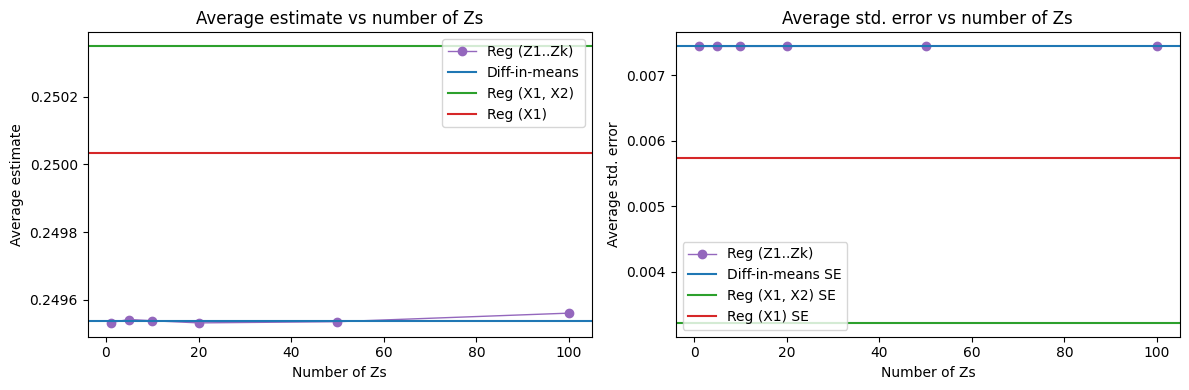

In [17]:
#### Plot: Zs with diff-in-means, reg_spec, reg_x
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(
    z_count_df["num_z"],
    z_count_df["avg_estimate"],
    marker="o",
    linewidth=1,
    color="#9467bd",
    label="Reg (Z1..Zk)",
)
axes[0].axhline(dm_est, color="#1f77b4", linestyle="-", label="Diff-in-means")
axes[0].axhline(reg_spec_avg, color="#2ca02c", linestyle="-", label="Reg (X1, X2)")
axes[0].axhline(reg_x1_avg, color="#d62728", linestyle="-", label="Reg (X1)")
axes[0].set_title("Average estimate vs number of Zs")
axes[0].set_xlabel("Number of Zs")
axes[0].set_ylabel("Average estimate")
axes[0].legend()

axes[1].plot(
    z_count_df["num_z"],
    z_count_df["avg_std_error"],
    marker="o",
    linewidth=1,
    color="#9467bd",
    label="Reg (Z1..Zk)",
)
axes[1].axhline(dm_se_avg, color="#1f77b4", linestyle="-", label="Diff-in-means SE")
axes[1].axhline(
    reg_spec_se_avg, color="#2ca02c", linestyle="-", label="Reg (X1, X2) SE"
)
axes[1].axhline(reg_x1_se_avg, color="#d62728", linestyle="-", label="Reg (X1) SE")
axes[1].set_title("Average std. error vs number of Zs")
axes[1].set_xlabel("Number of Zs")
axes[1].set_ylabel("Average std. error")
axes[1].legend()

for ax in axes:
    ax.ticklabel_format(style="plain", axis="both", useOffset=False)

plt.tight_layout()
plt.show()


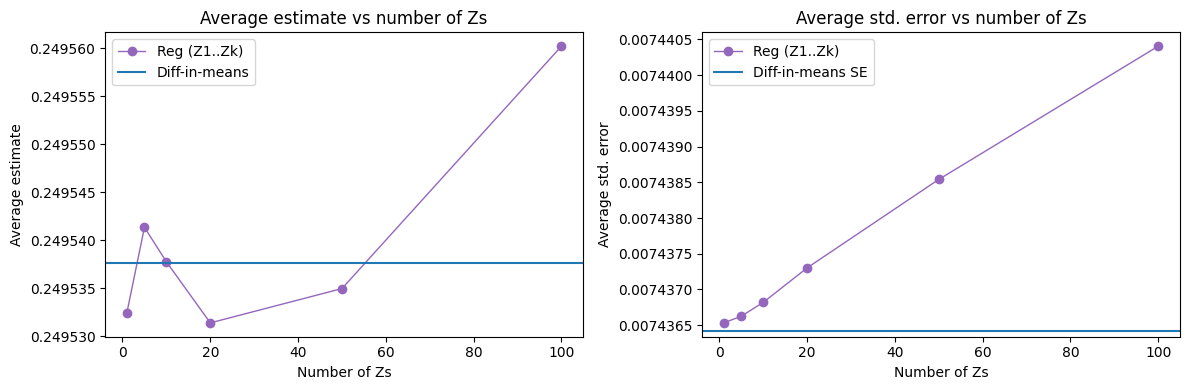

In [18]:
#### Plot: Zs with diff-in-means, reg_spec, reg_x
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(
    z_count_df["num_z"],
    z_count_df["avg_estimate"],
    marker="o",
    linewidth=1,
    color="#9467bd",
    label="Reg (Z1..Zk)",
)
axes[0].axhline(dm_est, color="#1f77b4", linestyle="-", label="Diff-in-means")
#axes[0].axhline(reg_spec_avg, color="#2ca02c", linestyle="-", label="Reg (X1, X2)")
#axes[0].axhline(reg_x1_avg, color="#d62728", linestyle="-", label="Reg (X1)")
axes[0].set_title("Average estimate vs number of Zs")
axes[0].set_xlabel("Number of Zs")
axes[0].set_ylabel("Average estimate")
axes[0].legend()

axes[1].plot(
    z_count_df["num_z"],
    z_count_df["avg_std_error"],
    marker="o",
    linewidth=1,
    color="#9467bd",
    label="Reg (Z1..Zk)",
)
axes[1].axhline(dm_se_avg, color="#1f77b4", linestyle="-", label="Diff-in-means SE")
#axes[1].axhline(
#    reg_spec_se_avg, color="#2ca02c", linestyle="-", label="Reg (X1, X2) SE"
#)
#axes[1].axhline(reg_x1_se_avg, color="#d62728", linestyle="-", label="Reg (X1) SE")
axes[1].set_title("Average std. error vs number of Zs")
axes[1].set_xlabel("Number of Zs")
axes[1].set_ylabel("Average std. error")
axes[1].legend()

for ax in axes:
    ax.ticklabel_format(style="plain", axis="both", useOffset=False)

plt.tight_layout()
plt.show()


The results seem intuitive. Under the classical regression framework, adding relevant variables helps reducing variance of $\hat{\tau}_{REG}$. This is because part of the variance in the outcome is captured through the covariates. However, irrelevant variables add noise which, unless we have sufficient data, will hurt the precision of our estimates.

### Lin's Estimator

It seems that if the set of covariates used to estimate $\hat{\tau}_{REG}$ is reasonable, we can improve in terms of variance upon $\hat{\tau}_{DM}$. Is there a better estimator? The answer is yes under certain conditions, and it is developed in [Lin (2013)](https://arxiv.org/pdf/1208.2301). It is a very simple modification to the specification used to estimate $\hat{\tau}_{REG}$:

$$Y_i \sim \alpha + \tau W_i + \beta_1 X_{1i} + \beta_2 X_{2i} + \delta_1 W_i (X_{1i} - \bar{X}_1) + \delta_2 W_i (X_{2i} - \bar{X}_2)$$

That is, we add an interaction term of the treatment indicator with the centered covariates. This estimate is asymptotically more efficient than $\hat{\tau}_{REG}$ unless either the treatment and control groups have equal sizes or the treatment effect and the covariates are  uncorrelated. 

Let's try it out.

In [19]:
estimators.lin_estimator(rct_df, cov=["X1", "X2"])

{'estimate': 0.2520604417360423,
 'std_error': 0.003235221541033687,
 'ci_95': [0.24571944727985984, 0.2584014361922248],
 'ci_size_perc': 5.031328527800295,
 'p_value': 0.0}

In [20]:
estimators.regression_based(rct_df, cov=["X1", "X2"])

{'estimate': 0.25206056243080704,
 'std_error': 0.0032351548783069828,
 'ci_95': [0.24571969863428467, 0.2584014262273294],
 'ci_size_perc': 5.031222445409725,
 'p_value': 0.0}

In [21]:
#### Sweep n: regression_based vs Lin (avg estimate/std error)
n_values = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]
S = 100

rows = []
for n in n_values:
    reg_estimates = []
    reg_std_errors = []
    lin_estimates = []
    lin_std_errors = []
    for s in range(S):
        params = base_params.copy()
        params["n"] = int(n)
        params["seed"] = base_params["seed"] + s if base_params["seed"] is not None else None
        df = dgp_simulation.simulate_dgp(**params)
        reg = estimators.regression_based(df, cov=["X1", "X2"])
        lin = estimators.lin_estimator(df, cov=["X1","X2"])
        reg_estimates.append(reg["estimate"])
        reg_std_errors.append(reg["std_error"])
        lin_estimates.append(lin["estimate"])
        lin_std_errors.append(lin["std_error"])
    rows.append(
        {
            "n": int(n),
            "reg_avg_estimate": float(np.mean(reg_estimates)),
            "reg_avg_std_error": float(np.mean(reg_std_errors)),
            "lin_avg_estimate": float(np.mean(lin_estimates)),
            "lin_avg_std_error": float(np.mean(lin_std_errors)),
        }
    )

n_sweep_lin_df = pd.DataFrame(rows)
n_sweep_lin_df

,n,reg_avg_estimate,reg_avg_std_error,lin_avg_estimate,lin_avg_std_error
0,50,0.247466,0.140665,0.245036,0.146165
1,100,0.259739,0.101158,0.260543,0.103251
2,500,0.247803,0.045742,0.247753,0.045925
3,1000,0.251708,0.032462,0.251728,0.032530
4,5000,0.248553,0.014483,0.248552,0.014489
5,10000,0.250616,0.010215,0.250617,0.010217
6,50000,0.250110,0.004559,0.250110,0.004559
7,100000,0.250350,0.003224,0.250350,0.003224


In our setting, $\hat{\tau}_{LIN}$ does not seem to provide any advantage with respect to $\hat{\tau}_{REG}$. What could be happening in this case?